In [ ]:
# The dependent libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk

In [ ]:
# Mount your G-Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset

df =pd.read_csv("/content/drive/MyDrive/data/loan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB




---



In [ ]:
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
target_column = ['Loan_Status'] 
predictors = list(set(list(df.columns))-set(target_column))

In [ ]:
print(target_column)
print(predictors)

['Loan_Status']
['Loan_Amount_Term', 'Dependents', 'Gender', 'Credit_History', 'Education', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Self_Employed', 'Married', 'Property_Area', 'Loan_ID']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
print(X_train.shape); print(X_test.shape)

(429, 12)
(185, 12)


In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim = 7, output_dim = 1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(32,1)
        self.dropout = nn.Dropout(0.15)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output_layer(x)
        
        return nn.Sigmoid()(x)

In [ ]:
model = ANN(input_dim = 7, output_dim = 1)

print(model)

ANN(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)


In [ ]:
print(X_train)

[[360.0 '0' 'Male' ... 'No' 'Urban' 'LP002893']
 [360.0 '0' 'Male' ... 'Yes' 'Semiurban' 'LP001835']
 [180.0 '1' 'Male' ... 'Yes' 'Rural' 'LP002517']
 ...
 [360.0 '2' 'Male' ... 'Yes' 'Rural' 'LP001497']
 [480.0 '0' 'Female' ... 'No' 'Rural' 'LP002603']
 [nan '0' 'Female' ... 'No' 'Urban' 'LP002357']]


In [ ]:
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

TypeError: ignored

--------------------------------------------------------------------------------


**Observe the Dataset**

In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Reading data into train and test

In [ ]:
train_data = df.iloc[:500]
test_data = df.iloc[500:]

train_default=train_data.copy()
test_default=test_data.copy()
# Let’s make a copy of the train and test data so that even if we change anything in these datasets we would not lose the original datasets

# train_set.tail()
# Ref: https://www.analyticsvidhya.com/blog/2022/02/loan-approval-prediction-machine-learning/

In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Identifying the Target variable**

In [ ]:
# Target Variable Unique Values

train_data.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# Target Variable 

train_data['Loan_Status'].value_counts()

Y    345
N    155
Name: Loan_Status, dtype: int64

In [ ]:
# Target Variable Normalize

train_data['Loan_Status'].value_counts(normalize=True)

Y    0.69
N    0.31
Name: Loan_Status, dtype: float64

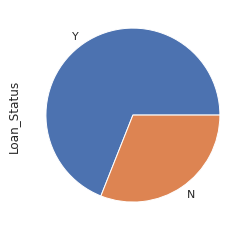

In [ ]:
train_data['Loan_Status'].value_counts().plot.pie()

Considering the above pie chart, the dataset is unbalanced

**Analyze the dataset**

Univariate Analysis


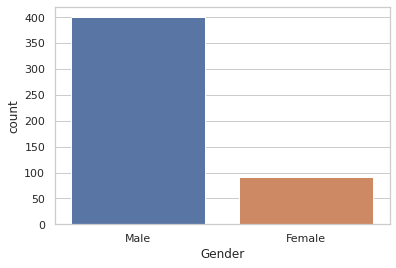

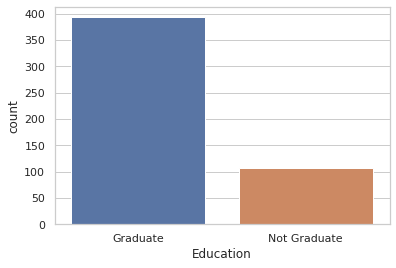

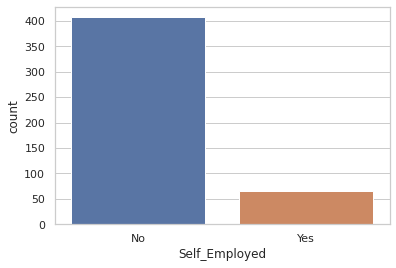

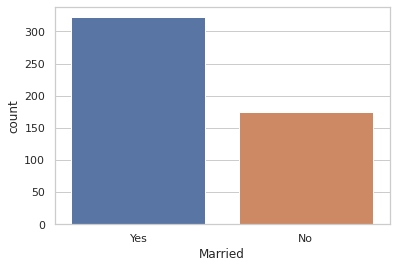

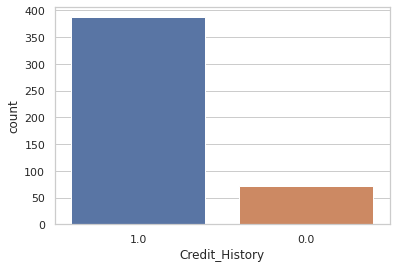

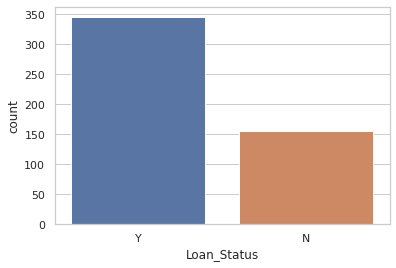

In [ ]:
sns.set_theme(style="whitegrid")

count = sns.countplot(data= train_data, x= 'Gender', order= train_data['Gender'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Education', order= train_data['Education'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Self_Employed', order= train_data['Self_Employed'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Married', order= train_data['Married'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Credit_History', order= train_data['Credit_History'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Loan_Status', order= train_data['Loan_Status'].value_counts().index)
plt.show()

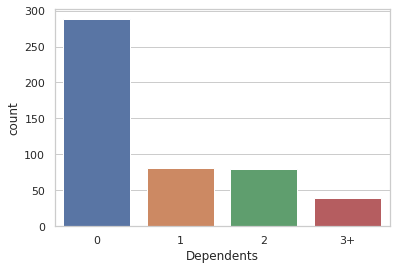

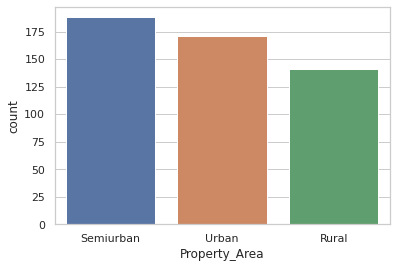

In [ ]:
# Ordinal Field analysis
sns.set_theme(style="whitegrid")

count = sns.countplot(data= train_data, x= 'Dependents', order= train_data['Dependents'].value_counts().index)
plt.show()
count = sns.countplot(data= train_data, x= 'Property_Area', order= train_data['Property_Area'].value_counts().index)
plt.show()

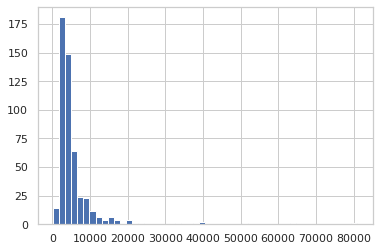

In [ ]:
# Numerical Analysis

train_data['ApplicantIncome'].hist(bins=50)

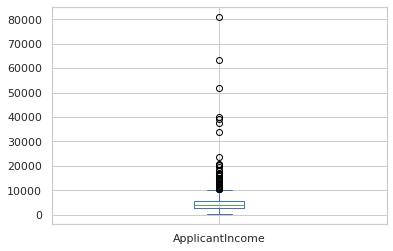

In [ ]:
train_data['ApplicantIncome'].plot.box() 

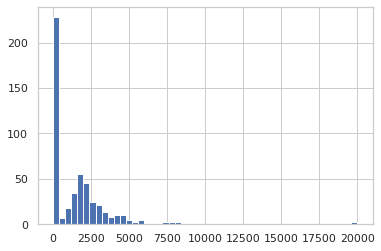

In [ ]:
train_data['CoapplicantIncome'].hist(bins=50)

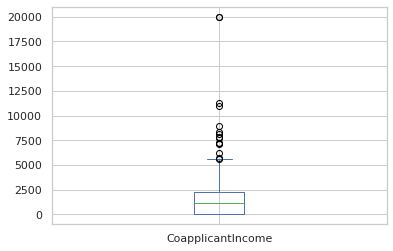

In [ ]:
train_data['CoapplicantIncome'].plot.box() 

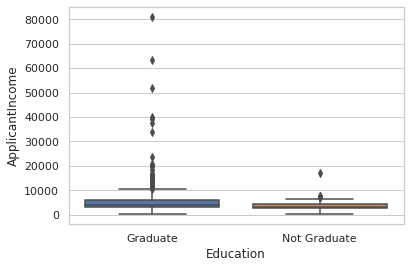

In [ ]:
sns.boxplot(x="Education", y="ApplicantIncome", data=train_data)

Bivariate Analysis

Categorical Independent Variable vs Target Variable

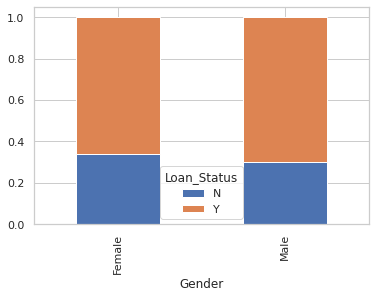

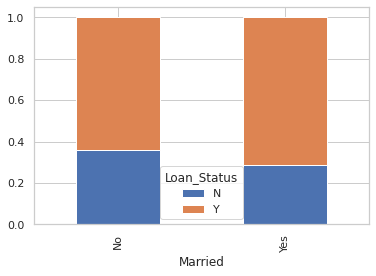

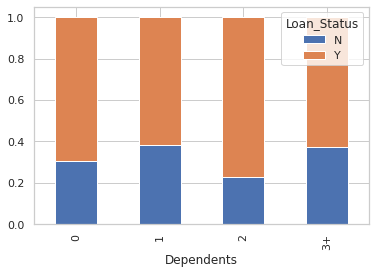

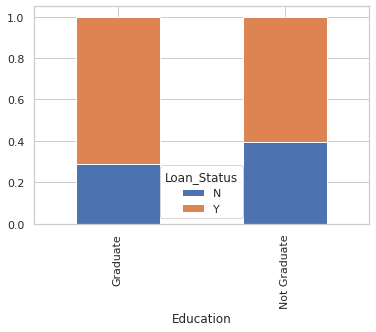

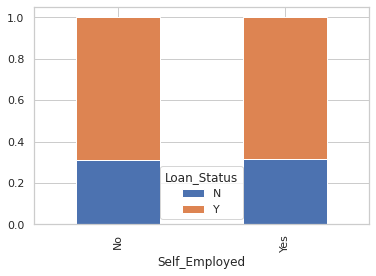

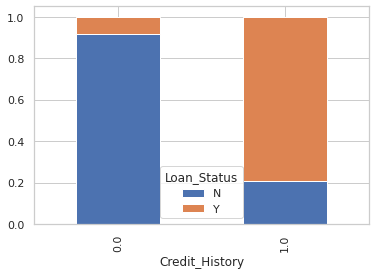

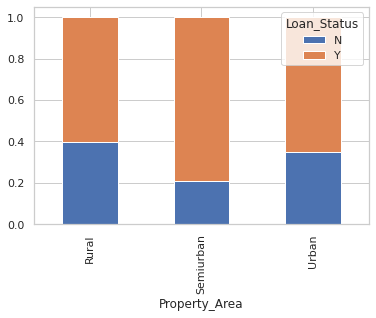

In [ ]:
# sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

GenderTarget=pd.crosstab(train_data['Gender'],train_data['Loan_Status']) 
GenderTarget.div(GenderTarget.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 

Married=pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 

Education=pd.crosstab(train_data['Education'],train_data['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])  
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])  
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])  
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

Numerical Independent Variable vs Target Variable

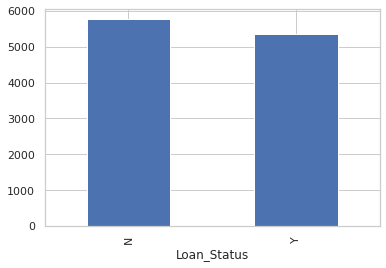

In [ ]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

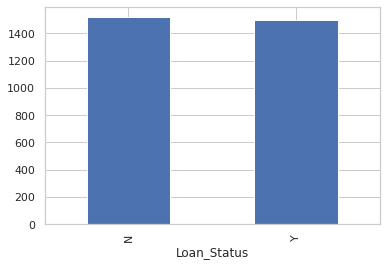

In [ ]:
train_data.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

<ipython-input-26-f2f4174fd951>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=group)


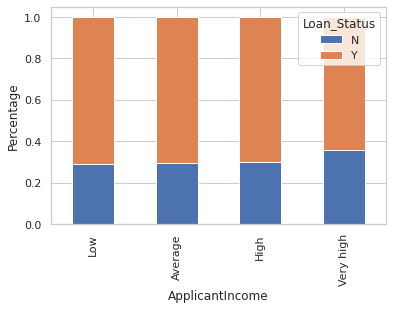

In [ ]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

<ipython-input-27-296514c5e0c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Coapplicant_Income_bin']=pd.cut(train_data['CoapplicantIncome'],bins,labels=group)


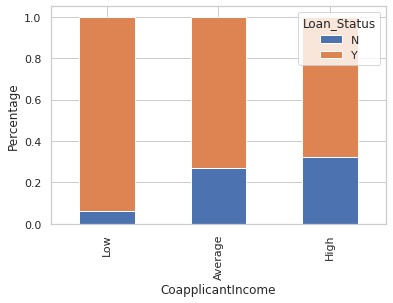

In [ ]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train_data['Coapplicant_Income_bin']=pd.cut(train_data['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


<ipython-input-181-1d982f7d4f98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
<ipython-input-181-1d982f7d4f98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)


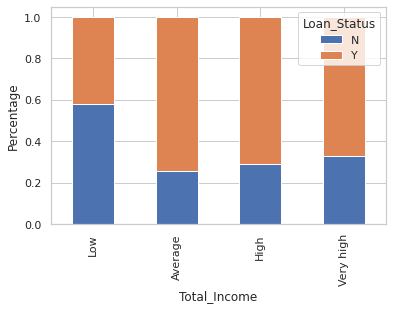

In [ ]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')


<ipython-input-182-f6008214fe4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)


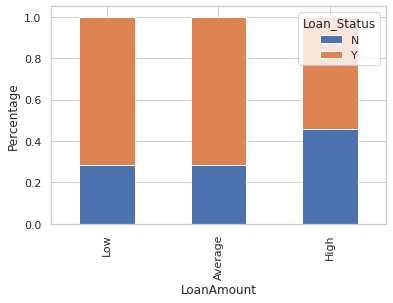

In [ ]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [ ]:
train_data.drop("Income_bin", axis=1,inplace=True,errors='ignore')
train_data.drop("Coapplicant_Income_bin", axis=1,inplace=True,errors='ignore')
# train_data.drop("Total_Income", axis=1,inplace=True,errors='ignore')
train_data.drop("Total_Income_bin", axis=1,inplace=True,errors='ignore')
train_data.drop("LoanAmount_bin", axis=1,inplace=True,errors='ignore')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pearsoncorr = train_data.corr(method='pearson')
pearsoncorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.121292,0.583289,-0.069086,-0.031342
CoapplicantIncome,-0.121292,1.000000,0.205980,0.006561,-0.028496
LoanAmount,0.583289,0.205980,1.000000,0.030737,-0.032947
Loan_Amount_Term,-0.069086,0.006561,0.030737,1.000000,0.018218
Credit_History,-0.031342,-0.028496,-0.032947,0.018218,1.000000


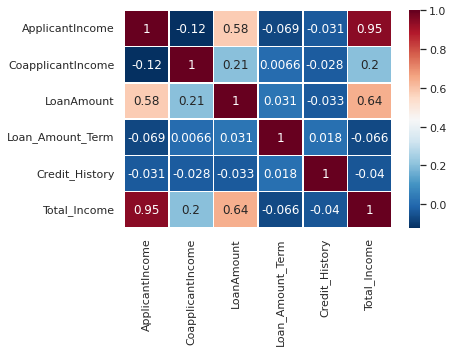

In [ ]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

# Data Visualisation Settings 
%matplotlib inline
sb.set_style('whitegrid')

kendall = train_data.corr(method='kendall')
kendall

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.224870,0.367473,-0.044957,0.027623,0.566588
CoapplicantIncome,-0.224870,1.000000,0.180892,0.010699,-0.020032,0.261526
LoanAmount,0.367473,0.180892,1.000000,0.030214,-0.007681,0.532295
Loan_Amount_Term,-0.044957,0.010699,0.030214,1.000000,0.030443,-0.035505
Credit_History,0.027623,-0.020032,-0.007681,0.030443,1.000000,-0.003086
Total_Income,0.566588,0.261526,0.532295,-0.035505,-0.003086,1.000000


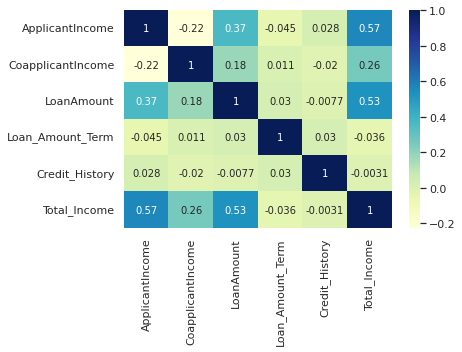

In [ ]:

sb.heatmap(kendall, 
           xticklabels=kendall.columns.values, 
           yticklabels=kendall.columns.values, 
           cmap="YlGnBu",
          annot=True)

### https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04
### https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
### https://medium.com/@pritul.dave/pearson-and-spearman-correlation-coeffecients-8dd60e82469c

In [ ]:
spearman = train_data.corr(method='spearman')
spearman

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.312587,0.511314,-0.056042,0.033774,0.722232
CoapplicantIncome,-0.312587,1.000000,0.232768,0.012899,-0.022917,0.317402
LoanAmount,0.511314,0.232768,1.000000,0.038043,-0.009356,0.694051
Loan_Amount_Term,-0.056042,0.012899,0.038043,1.000000,0.031155,-0.043597
Credit_History,0.033774,-0.022917,-0.009356,0.031155,1.000000,-0.003775
Total_Income,0.722232,0.317402,0.694051,-0.043597,-0.003775,1.000000


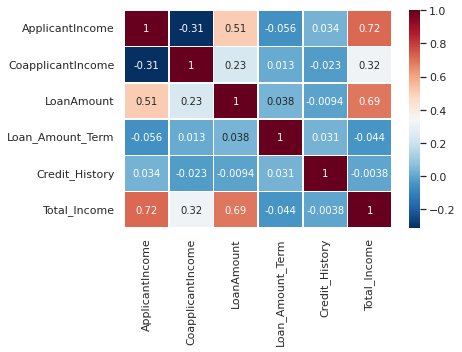

In [ ]:
sb.heatmap(spearman, 
            xticklabels=spearman.columns,
            yticklabels=spearman.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

**Identify Missing values**

In [ ]:
#Drop unwanted columns in train data

df.drop("Loan_ID", axis=1,inplace=True,errors='ignore')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Drop unwanted columns in test data

test_data.drop("Loan_ID", axis=1,inplace=True,errors='ignore')
test_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
500,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
501,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y
503,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
504,Male,Yes,0,Not Graduate,No,3814,1483.0,124.0,300.0,1.0,Semiurban,Y


In [ ]:
## identify Missing values

df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

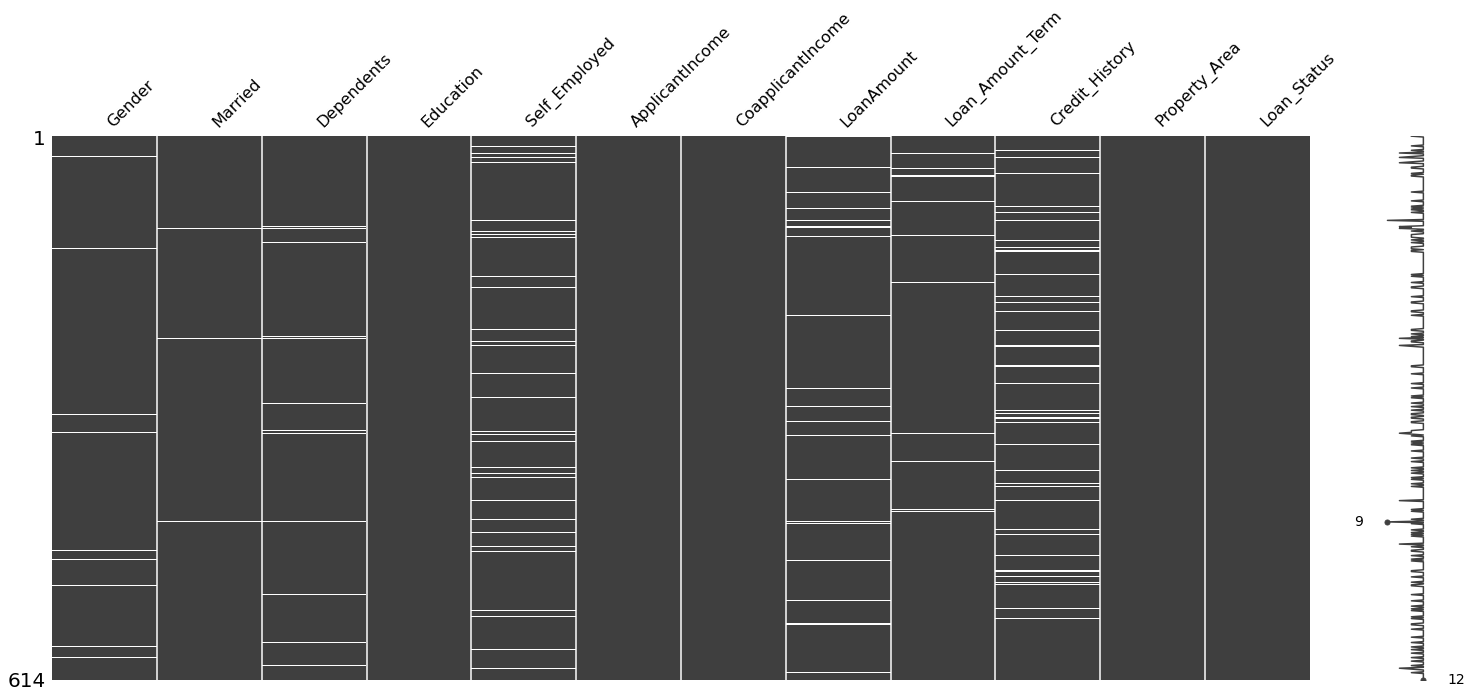

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
## Imputing the missing values

for i in [df]:
  i["Gender"] = i["Gender"].fillna(df.Gender.dropna().mode()[0])
  i["Married"] = i["Married"].fillna(df.Married.dropna().mode()[0])
  i["Dependents"] = i["Dependents"].fillna(df.Dependents.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(df.Self_Employed.dropna().mode()[0])
  i["Credit_History"] = i["Credit_History"].fillna(df.Credit_History.dropna().mode()[0])

# for i in [df]:
#   i["Gender"] = i["Gender"].fillna(df.Gender.dropna().mode()[0])
#   i["Married"] = i["Married"].fillna(df.Married.dropna().mode()[0])
#   i["Dependents"] = i["Dependents"].fillna(df.Dependents.dropna().mode()[0])
#   i["Self_Employed"] = i["Self_Employed"].fillna(df.Self_Employed.dropna().mode()[0])
#   i["Credit_History"] = i["Credit_History"].fillna(df.Credit_History.dropna().mode()[0])


# test_set['Gender'].fillna(train_set['Gender'].mode()[0], inplace=True) 
# test_set['Dependents'].fillna(train_set['Dependents'].mode()[0], inplace=True) 
# test_set['Self_Employed'].fillna(train_set['Self_Employed'].mode()[0], inplace=True) 
# test_set['Credit_History'].fillna(train_set['Credit_History'].mode()[0], inplace=True) 
# test_set['Loan_Amount_Term'].fillna(train_set['Loan_Amount_Term'].mode()[0], inplace=True) 
# test_set['LoanAmount'].fillna(train_set['LoanAmount'].median(), inplace=True)

In [ ]:
## imputing Missing values

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
# test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [ ]:
## identify Missing values

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## identify Missing values

test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from urllib import error
df["Loan_Status"] = df["Loan_Status"].map({'N':0, "Y":1}).astype(int)

# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
                      
# for i in [train_data]:
#   i["Gender"] = i["Gender"].map({"Male":0, "Female":1}).astype(int)
#   i["Married"] = i["Married"].map({"No":0, "Yes":1}).astype(int)
#   i["Education"] = i["Education"].map({"Not Graduate":0, "Graduate":1}).astype(int)
#   i["Self_Employed"] = i["Self_Employed"].map({"No":0, "Yes":1}).astype(int)
#   i["Credit_History"] = i["Credit_History"].astype(int)

In [ ]:
df["Dependents"] = df["Dependents"].map({"3+":'3', "3":'3', "2":'2', "1":'1',"0":'0'})

In [ ]:
df['Dependents'] = df['Dependents'].astype('int')

<function matplotlib.pyplot.show(*args, **kw)>

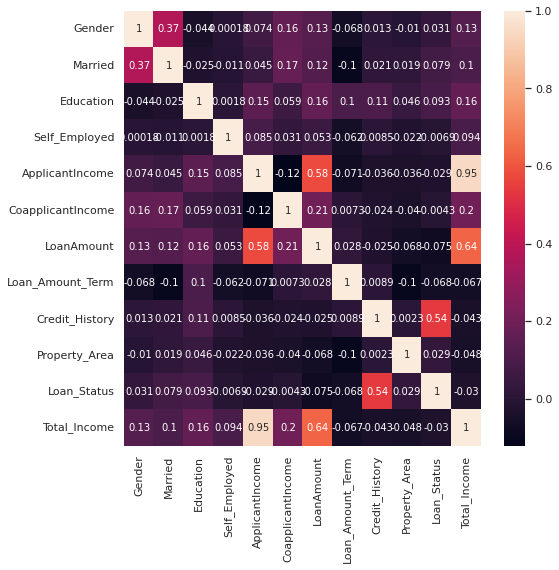

In [ ]:
plt.figure(figsize=(8,8))
correlation_matrix=train_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show

# Ref: https://deepnote.com/@rhishab-mukherjee/Loan-Prediction-Project-TermPaper-54f48ea6-2cb0-4aee-8565-e3767caf1fba

In [ ]:
train_data.head(30)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,126.5,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1,3849.0
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,0,5540.0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1,5532.0
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0,23809.0


The above matrix is correlation matrix, i think it requires scope of improvement but you guys can have a look.

Outlier Treatment

Log Transformation


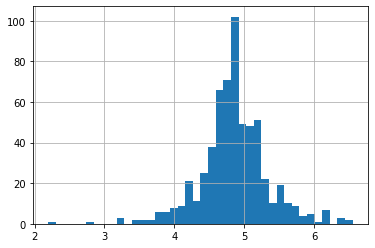

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=40) 

<ipython-input-200-6e800731f8eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])


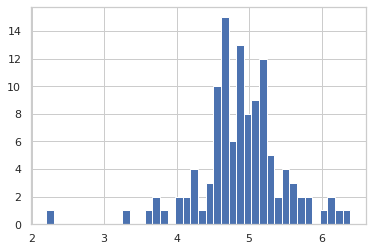

In [ ]:
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])
test_data['LoanAmount_log'].hist(bins=40)

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

target_column = ['Loan_Status'] 
predictors = list(set(list(df.columns))-set(target_column))

print(target_column)
print(predictors)

X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
print(X_train.shape); print(X_test.shape)

['Loan_Status']
['Self_Employed', 'Loan_Amount_Term', 'LoanAmount_log', 'ApplicantIncome', 'Property_Area', 'Married', 'LoanAmount', 'Education', 'Dependents', 'Gender', 'Credit_History', 'CoapplicantIncome']
(429, 12)
(185, 12)


In [ ]:
class ANN(nn.Module):
    def __init__(self, input_dim = 11, output_dim = 1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 32)
        self.output_layer = nn.Linear(32,1)
        self.dropout = nn.Dropout(0.15)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output_layer(x)
        
        return nn.Sigmoid()(x)

In [ ]:
model = ANN(input_dim = 11, output_dim = 1)

print(model)

ANN(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)


In [ ]:
X = train_data.drop('Loan_Status',1) 
y = train_data.Loan_Status
X=pd.get_dummies(X) 
train=pd.get_dummies(train_data) 
test=pd.get_dummies(test_data)

<ipython-input-201-d9c8095cade8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_data.drop('Loan_Status',1)


In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression() 
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).view(-1,1)


X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).view(-1,1)

In [ ]:
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [ ]:
model = ANN(input_dim = 11, output_dim = 1)

print(model)

ANN(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)


In [ ]:
import torch.optim as optim
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay= 1e-6, momentum = 0.8)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
# lines 1 to 6
epochs = 10
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# lines 7 onwards
model.train() # prepare model for training

for epoch in range(epochs):
    trainloss = 0.0
    valloss = 0.0
    
    correct = 0
    total = 0
    for data,target in train_loader:
        data = Variable(data).float()
        target = Variable(target).type(torch.FloatTensor)
        optimizer.zero_grad()
        output = model(data)
        predicted = (torch.round(output.data[0]))
        total += len(target)
        correct += (predicted == target).sum()

        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        trainloss += loss.item()*data.size(0)

    train_loss = trainloss/len(train_loader.dataset)
    accuracy = 100 * correct / float(total)
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.4f}\t Acc: {:.2f}%'.format(
        epoch+1, 
        train_loss,
        accuracy
        ))
    epoch_list.append(epoch + 1)

RuntimeError: ignored

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8

Confusion **Matrix** Section

In [ ]:
df_matrix =pd.read_csv("/content/drive/MyDrive/data/loan.csv")

In [ ]:
df_matrix.drop("Loan_ID", axis=1,inplace=True,errors='ignore')
df_matrix.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
for i in [df_matrix]:
  i["Gender"] = i["Gender"].fillna(df.Gender.dropna().mode()[0])
  i["Married"] = i["Married"].fillna(df.Married.dropna().mode()[0])
  i["Dependents"] = i["Dependents"].fillna(df.Dependents.dropna().mode()[0])
  i["Self_Employed"] = i["Self_Employed"].fillna(df.Self_Employed.dropna().mode()[0])
  i["Credit_History"] = i["Credit_History"].fillna(df.Credit_History.dropna().mode()[0])

In [ ]:
df_matrix['Loan_Amount_Term'].fillna(df_matrix['Loan_Amount_Term'].mode()[0], inplace=True)
df_matrix['LoanAmount'].fillna(df_matrix['LoanAmount'].median(), inplace=True)

In [ ]:
from urllib import error
df_matrix["Loan_Status"] = df_matrix["Loan_Status"].map({'N':0, "Y":1}).astype(int)

# convert categorical columns to numerical values
df_matrix.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
df_matrix["Dependents"] = df_matrix["Dependents"].map({"3+":'3', "3":'3', "2":'2', "1":'1',"0":'0'})

In [ ]:
x=df_matrix.drop('Loan_Status',1)
y=df_matrix.Loan_Status
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)


<ipython-input-211-783933f544a5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df_matrix.drop('Loan_Status',1)


In [ ]:
model_multi=MultinomialNB()
model_multi.fit(x_train,y_train)

MultinomialNB()

Accuracy achieved on test data

In [ ]:
model_multi.score(x_test,y_test)

0.4594594594594595

Calculation for precision,recall & f1 scores 

In [ ]:
pred_multi=model_multi.predict(x_test)

In [ ]:
precis_multi=metrics.precision_score(pred_multi,y_test,average=None)
recal_multi=metrics.recall_score(pred_multi,y_test,average=None)
f1_multi=metrics.f1_score(pred_multi,y_test,average=None)
print("MultinomialNB Precision={},recall={},f1={}".format(precis_multi,recal_multi,f1_multi))

MultinomialNB Precision=[0.44444444 0.46721311],recall=[0.30107527 0.61956522],f1=[0.35897436 0.53271028]


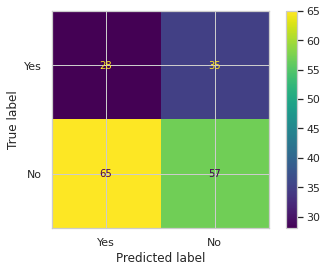

In [ ]:
cm_multi =metrics.confusion_matrix(y_test,pred_multi,labels=model_multi.classes_)
disp_multi=metrics.ConfusionMatrixDisplay(confusion_matrix=cm_multi,display_labels=['Yes','No'])
disp_multi.plot()


In [ ]:
TP = cm_multi[1][1]
TN = cm_multi[0][0]    
FP = cm_multi[0][1]   
FN = cm_multi[1][0]


In [ ]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
# calculate recall
conf_recall =(TN/(FN+TN))


In [ ]:
print(f'Accuracy: {round(conf_accuracy,2)}')     
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')
print(f'Recall Score: {round(conf_recall,2)}')

Accuracy: 0.52
Sensitivity: 0.58
Specificity: 0.42
Precision: 0.42
f_1 Score: 0.48
Recall Score: 0.32


**ROC AUC using python logistic regression model**

```

```



In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)    # model fitting
y_pred = logreg.predict(x_test)   # Predictions

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred_proba = [i[1] for i in logreg.predict_proba(x_test)]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})


In [ ]:
plt.figure(figsize = (10,7))

thresholds = np.linspace(0, 1, 200)

<Figure size 720x504 with 0 Axes>

In [ ]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

In [ ]:
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

In [ ]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]


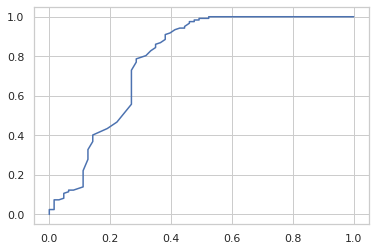

In [ ]:
# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')


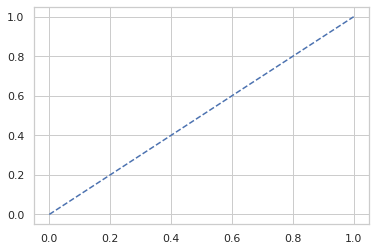

In [ ]:
# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')


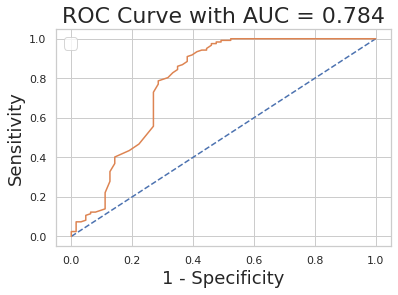

In [ ]:
# Label axes.
plt.title(f"ROC Curve with AUC = {round(metrics.roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)
# Create legend.
plt.legend(fontsize=16);
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
